<a href="https://colab.research.google.com/github/khushijhawar/Face_Lock/blob/main/Face_Lock_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount google drive
#Do not run this

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import necessary packages

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *

import warnings
warnings.filterwarnings("ignore")

In [ ]:
my_dir = "/content/drive/My Drive/dl_projects/Face_Lock"

In [ ]:
predictor = load_learner(my_dir)

In [ ]:
!wget -O "haarcascade_frontalface_default.xml" "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2020-10-27 11:10:57--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-10-27 11:10:57 (7.03 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [ ]:
import os
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=Image.open(image_link)
    if my_image.mode in ("RGBA", "P"):
      my_image = my_image.convert("RGB")
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

def my_predictor(test):
  img = cv2.imread(test)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 5)

  #cv2_imshow(img)
  cv2.imwrite("1.jpg", img)

  crop_img = face_cropper(test,faces)
  
  if(len(crop_img)!=0):
    os.makedirs("Prediction", exist_ok = True)
    
    for i in range(len(crop_img)):
      crop_img[i].save("/content/Prediction/img"+f"{i}.jpg")

      prediction_image = open_image("/content/Prediction/img"+f"{i}.jpg")

      predict_class,pred_idx,outputs=predictor.predict(prediction_image)

      #for (x, y, w, h) in faces:

      x = faces[i, 0]
      y = faces[i, 1]
      font = cv2.FONT_HERSHEY_SIMPLEX 
      #font = cv2.PACIFICO
      org = (x,y) 
      fontScale = 1
      color = (0, 0, 255) 
      thickness = 2
      img = cv2.putText(img, str(predict_class), org, font,fontScale, color, thickness, cv2.LINE_AA) 
      
    cv2.imwrite("final.jpg", img)
    cv2_imshow(img)
      
      #print(i, predict_class)


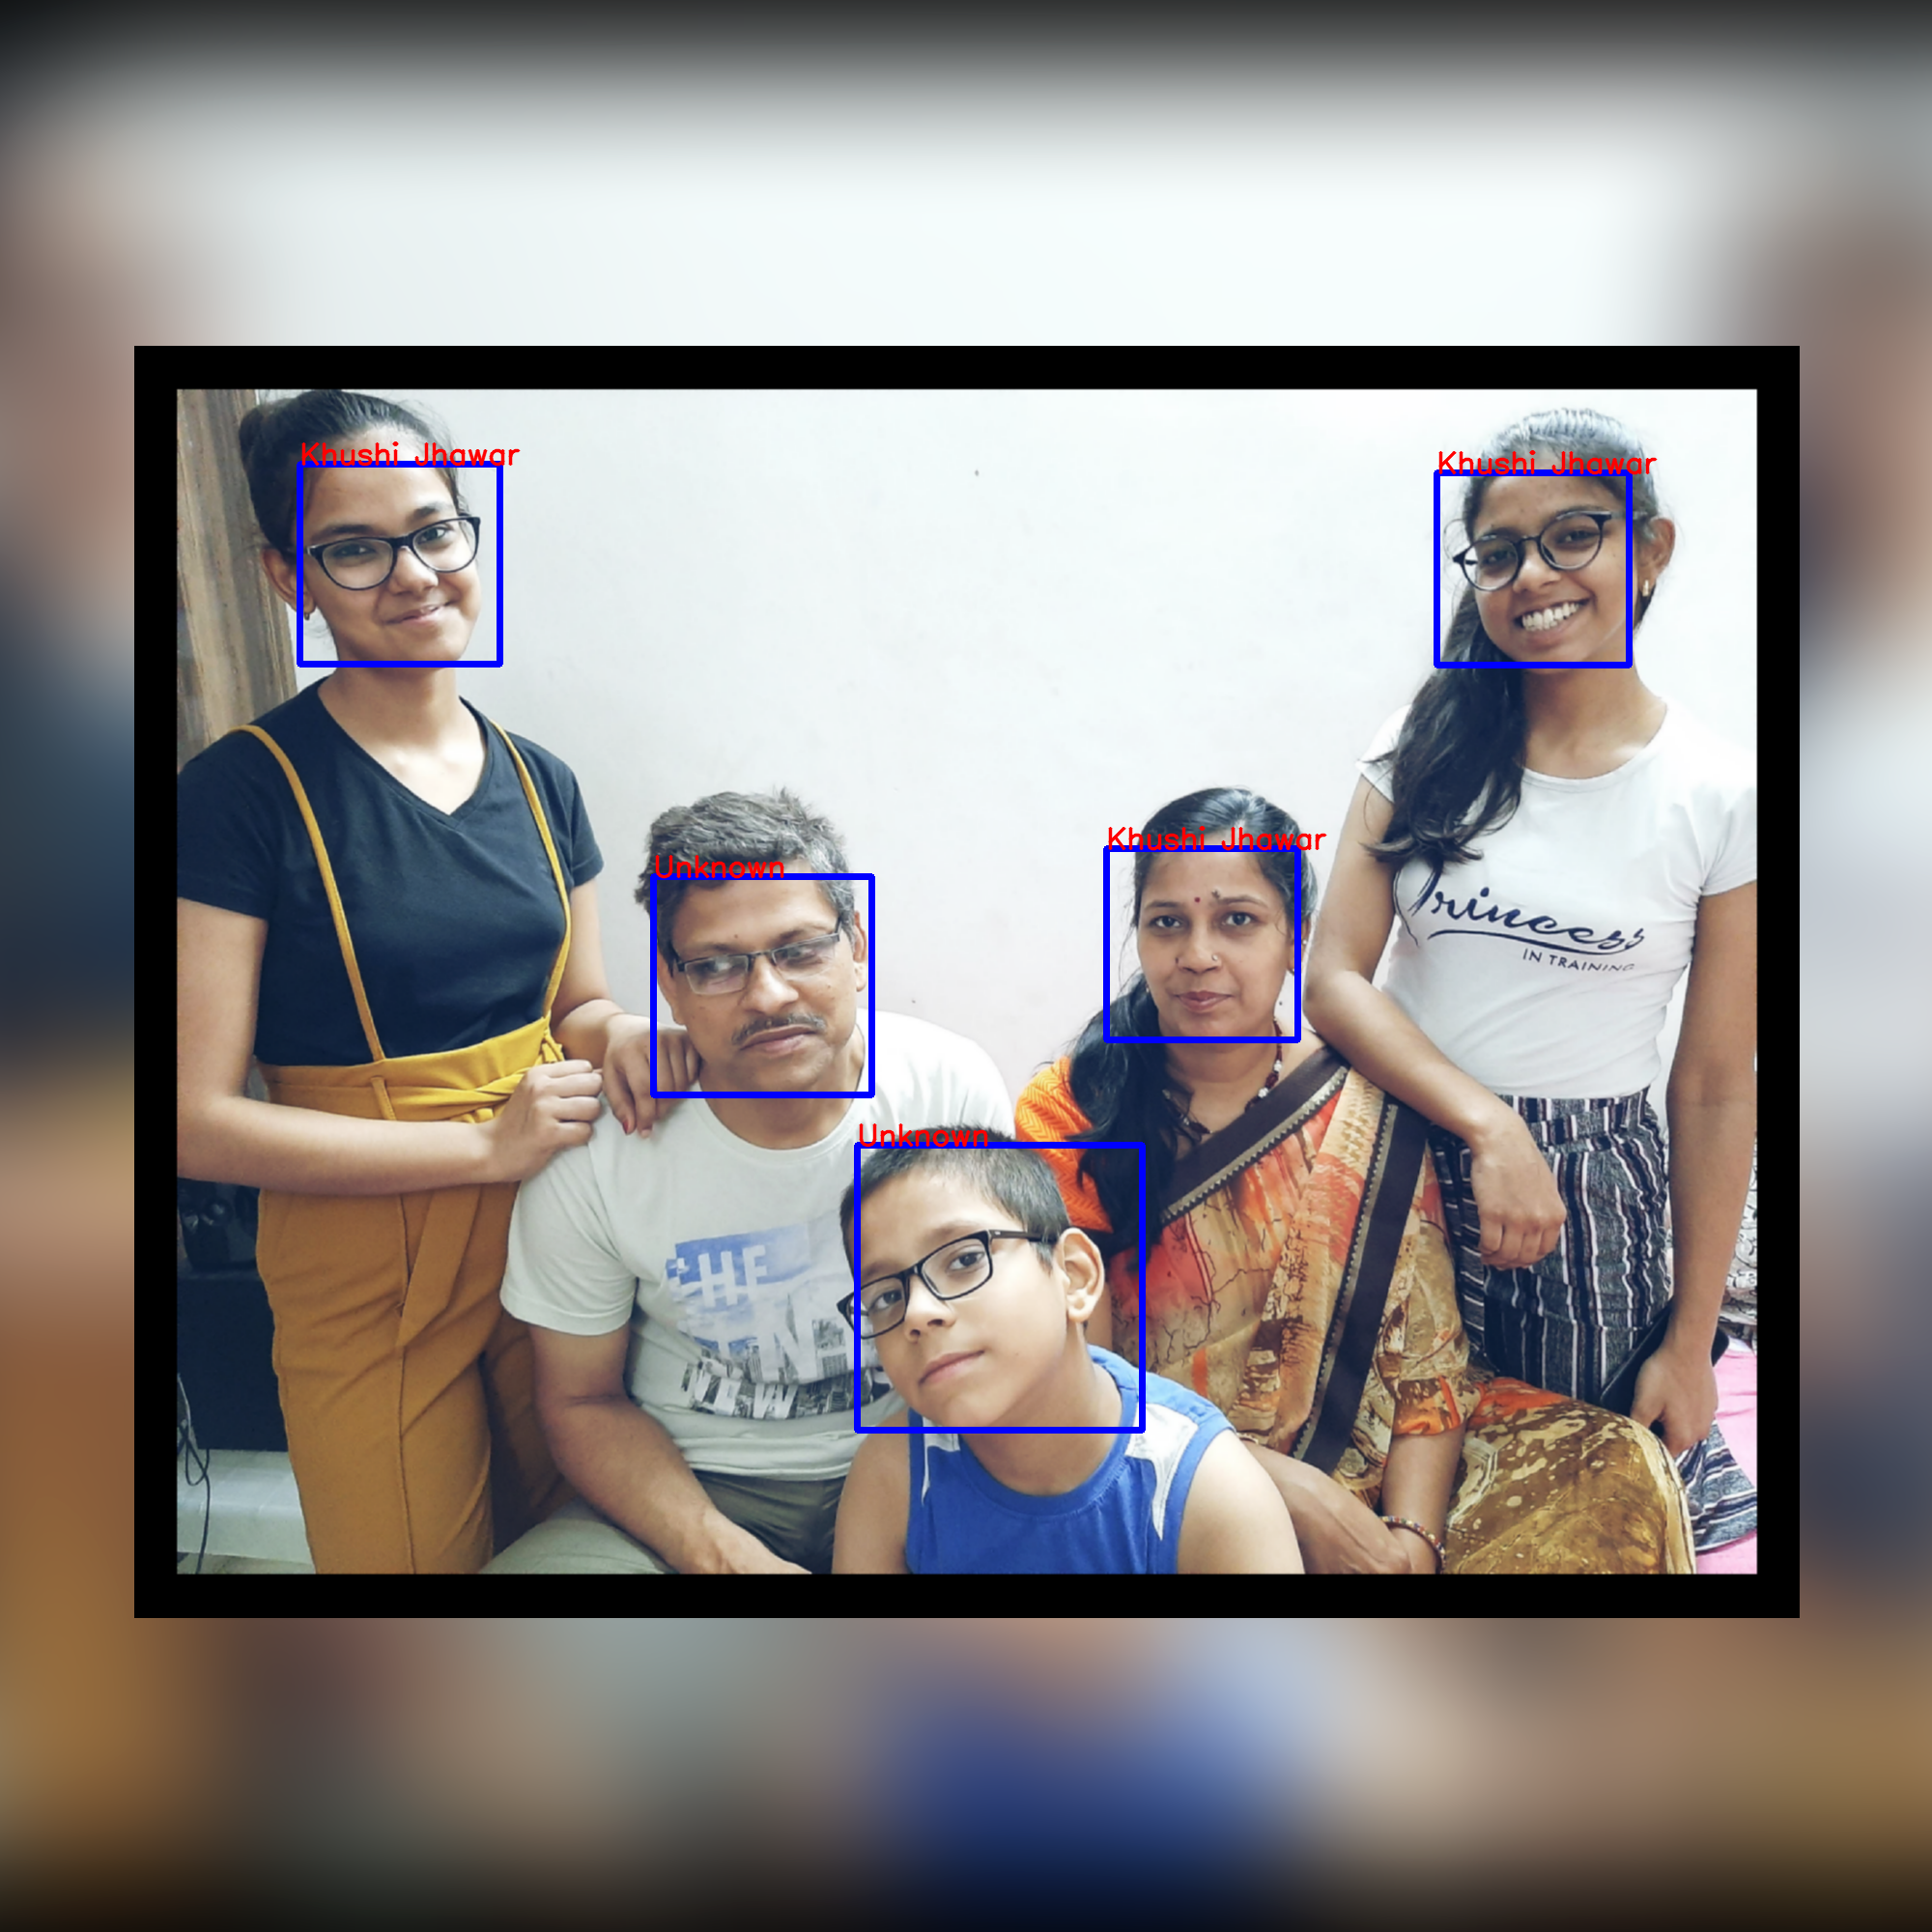

In [ ]:
image = "/content/PicsArt_06-21-12.52.07.png"
my_predictor(image)

In [ ]:
import shutil
shutil.rmtree("/content/Prediction")